In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
# Charger les données
file_path = 'Transfert_ new.csv'
transfert_data = pd.read_csv(file_path, sep=';')
transfert_data.columns = transfert_data.columns.str.strip().str.replace('ï»¿', '')

In [9]:
# Convertir la colonne 'dou' en datetime si nécessaire
transfert_data['dou'] = pd.to_datetime(transfert_data['dou'], errors='coerce')

# Ajouter une colonne année et mois
transfert_data['année_mois'] = transfert_data['dou'].dt.to_period('M')

# Calculer la somme des flux par mois
flux_mensuels = transfert_data.groupby('année_mois')['mcfa'].sum().reset_index()
flux_mensuels['année_mois'] = flux_mensuels['année_mois'].dt.to_timestamp()
flux_mensuels = flux_mensuels.set_index('année_mois')

In [10]:
# Séparation des données en ensembles d'entraînement et de test
train_size = int(len(flux_mensuels) * 0.8)
train = flux_mensuels.iloc[:train_size]
test = flux_mensuels.iloc[train_size:]

In [11]:
# Étape 2 : Identification des paramètres du modèle SARIMA
# Ici, nous devons essayer plusieurs combinaisons de paramètres (p, d, q) et (P, D, Q, s)
# Pour simplifier, nous utilisons les valeurs suivantes (mais elles peuvent être ajustées)
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # s=12 pour les données mensuelles

In [12]:
# Étape 3 : Ajustement du modèle SARIMA
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [13]:
# Étape 4 : Prévision sur l'ensemble de test
forecast = results.get_forecast(steps=len(test))
forecast_index = test.index
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [14]:
# Étape 5 : Évaluation des performances
mae = mean_absolute_error(test, forecast_series)
mse = mean_squared_error(test, forecast_series)
r2 = r2_score(test, forecast_series)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Coefficient of Determination (R²): {r2}')

Mean Absolute Error (MAE): 23155995958.244804
Mean Squared Error (MSE): 6.015683313688934e+20
Coefficient of Determination (R²): -2.246368410110977


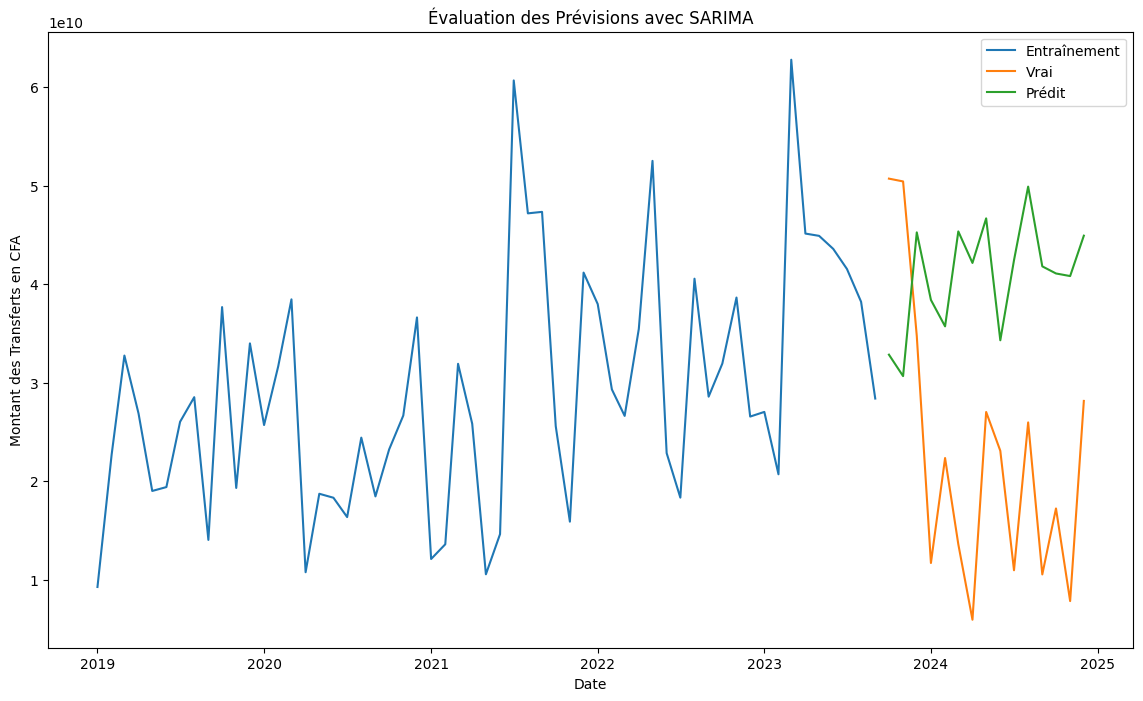

In [15]:
# Étape 6 : Visualisation des résultats
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Entraînement')
plt.plot(test.index, test, label='Vrai')
plt.plot(forecast_series.index, forecast_series, label='Prédit')
plt.xlabel('Date')
plt.ylabel('Montant des Transferts en CFA')
plt.title('Évaluation des Prévisions avec SARIMA')
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26216\3430774786.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_forecast_index = pd.date_range(start=test.index[-1], periods=future_steps + 1, freq='M')[1:]


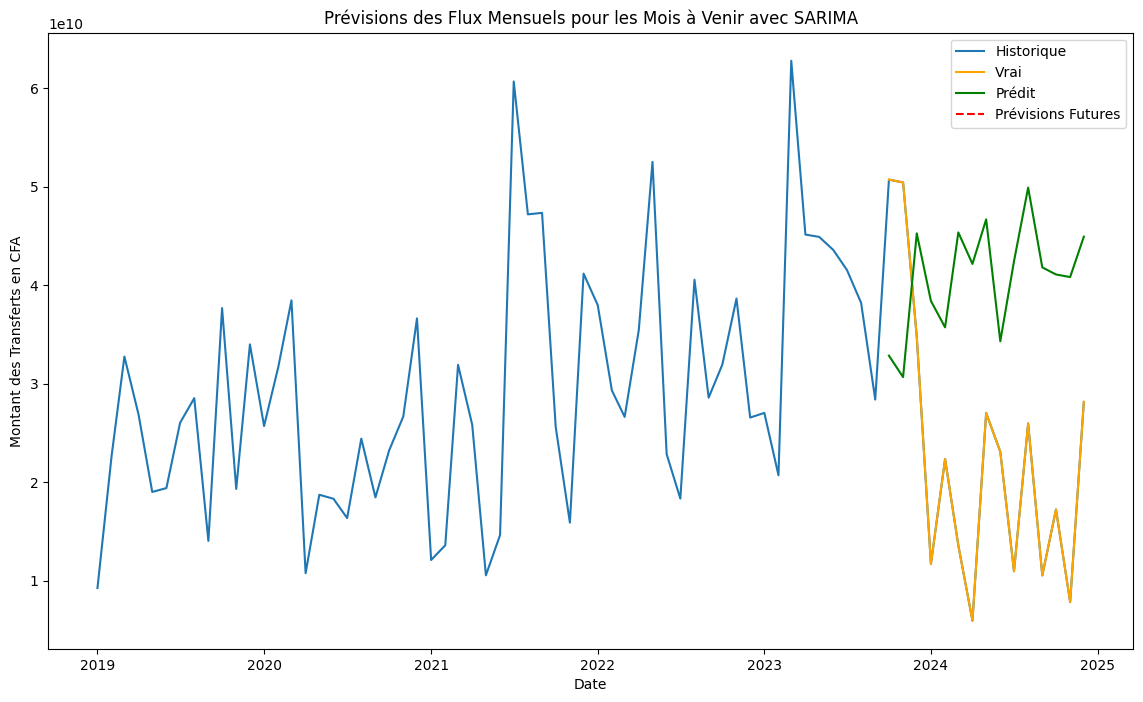

In [18]:
# Prévision pour les mois à venir
future_steps = 12
future_forecast = results.get_forecast(steps=future_steps)
future_forecast_index = pd.date_range(start=test.index[-1], periods=future_steps + 1, freq='M')[1:]
future_forecast_series = pd.Series(future_forecast.predicted_mean, index=future_forecast_index)

# Étape 6 : Visualisation des résultats
plt.figure(figsize=(14, 8))
plt.plot(flux_mensuels.index, flux_mensuels, label='Historique')
plt.plot(test.index, test, label='Vrai', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Prédit', color='green')
plt.plot(future_forecast_series.index, future_forecast_series, label='Prévisions Futures', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Montant des Transferts en CFA')
plt.title('Prévisions des Flux Mensuels pour les Mois à Venir avec SARIMA')
plt.legend()
plt.show()

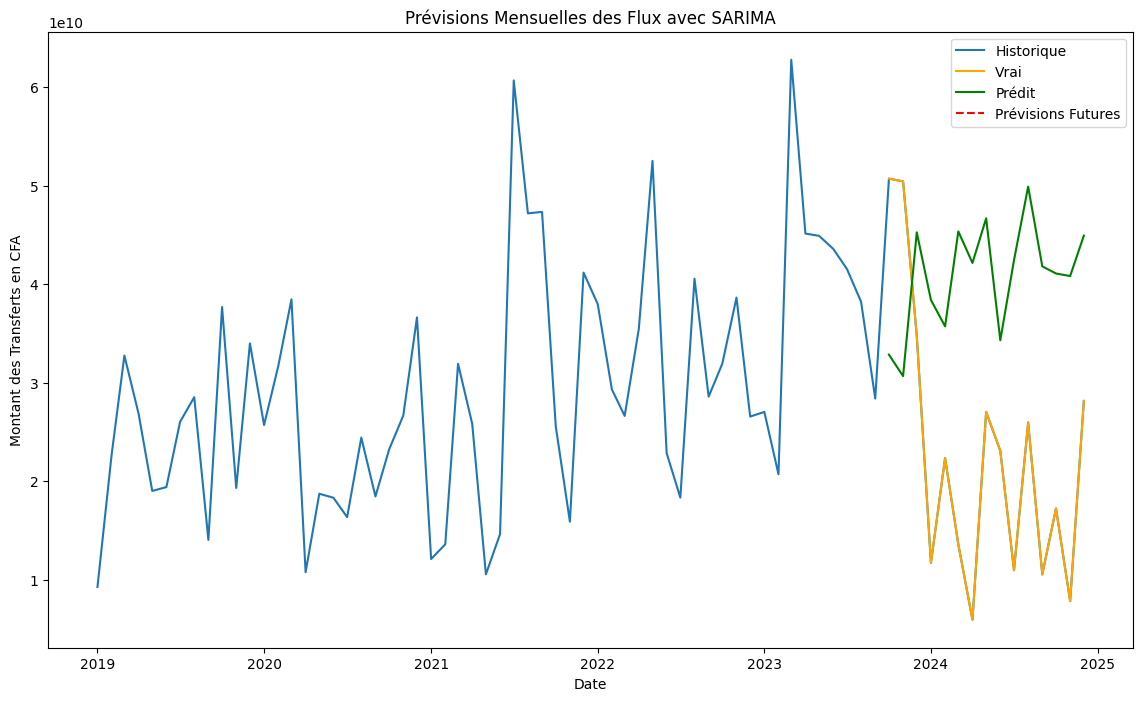

In [19]:
# Étape 6 : Visualisation des résultats
plt.figure(figsize=(14, 8))
plt.plot(flux_mensuels.index, flux_mensuels, label='Historique')
plt.plot(test.index, test, label='Vrai', color='orange')
plt.plot(forecast_series.index, forecast_series, label='Prédit', color='green')
plt.plot(future_forecast_series.index, future_forecast_series, label='Prévisions Futures', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Montant des Transferts en CFA')
plt.title('Prévisions Mensuelles des Flux avec SARIMA')
plt.legend()
plt.show()